In [1]:
# library
import re
import string
import nltk
import warnings
warnings.filterwarnings('ignore', category = DeprecationWarning)

import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

#visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#missingno
import missingno


In [2]:
# load dataset
train_data = pd.read_csv('twitter_data/train_data.csv')
test_data = pd.read_csv('twitter_data/test_data.csv')
sample_sub = pd.read_csv('twitter_data/sample_submission.csv')

In [3]:
train_data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
test_data.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [5]:
sample_sub.head()

,id,label
0,31963,0
1,31964,0
2,31965,0
3,31966,0
4,31967,0


In [6]:
# join train and test files
data_raw = train_data.append(test_data, ignore_index = True, sort = False)

In [7]:
data_raw.head()

,id,label,tweet
0,1,0.0,@user when a father is dysfunctional and is s...
1,2,0.0,@user @user thanks for #lyft credit i can't us...
2,3,0.0,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation


In [8]:
data_raw.tail()

,id,label,tweet
49154,49155,NaN,thought factory: left-right polarisation! #tru...
49155,49156,NaN,feeling like a mermaid ð #hairflip #neverre...
49156,49157,NaN,#hillary #campaigned today in #ohio((omg)) &am...
49157,49158,NaN,"happy, at work conference: right mindset leads..."
49158,49159,NaN,"my song ""so glad"" free download! #shoegaze ..."


In [9]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49159 entries, 0 to 49158
Data columns (total 3 columns):
id       49159 non-null int64
label    31962 non-null float64
tweet    49159 non-null object
dtypes: float64(1), int64(1), object(1)
memory usage: 1.1+ MB


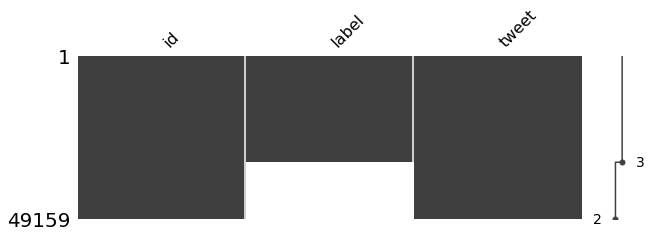

In [10]:
missingno.matrix(data_raw, figsize=(10,3));

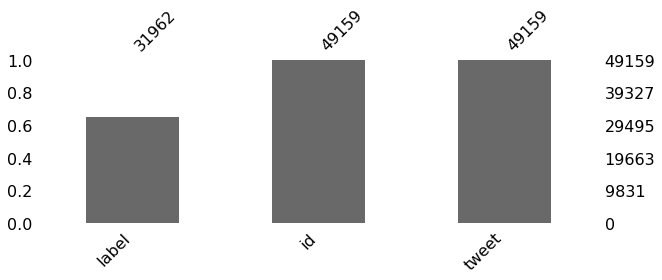

In [11]:
missingno.bar(data_raw, sort="ascending", figsize=(10,3));

In [12]:
# removing twitter handles: @users
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

In [13]:
data_raw['tidy_tweet'] = np.vectorize(remove_pattern)(data_raw['tweet'], "@[\w]*")

In [14]:
# removing punctution, number and special characters expect characters and hashtags with spaces
data_raw['tidy_tweet'] = data_raw['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")

In [15]:
# removing short words having length 3 or less
data_raw['tidy_tweet'] = data_raw['tidy_tweet'].apply(
    lambda x: ' '.join([w for w in x.split() if len(w)> 3]))

In [16]:
data_raw.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


In [17]:
# tokenization: we will tokenize all the clean tweets in the dataset
# tokens are individual terms or words and tokenization is 
#the process of splitting a string of text into tokens
tokenized_tweet = data_raw['tidy_tweet'].apply(lambda x:x.split())

In [18]:
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: tidy_tweet, dtype: object

In [26]:
# stemming is rule based process of stripping 
# the suffixes ("ing", "ly", "es", "s" etc) from a word
from nltk.stem.porter import *

stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])

In [27]:
tokenized_tweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: tidy_tweet, dtype: object

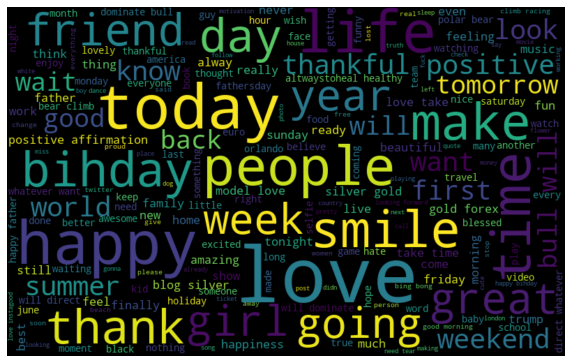

In [20]:
# Understanding the common words used in tweets:WordCloud
# WordCloud is a visualization 
# where the most frequent words appear in large size and the less frequent words appear in smaller sizes

all_words = ' '.join([text for text in data_raw['tidy_tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, 
                      height = 500, 
                      random_state = 21, 
                      max_font_size = 110).generate(all_words)
plt.figure(figsize = (10, 7))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()